<h2 align=center>Tumor Diagnosis (Part 1): Exploratory Data Analysis</h2>
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Task 1: Loading Libraries and Data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

In C:\Users\Ajinkeya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Ajinkeya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Ajinkeya\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
data=pd.read_csv('data.csv')

<h2 align=center> Exploratory Data Analysis </h2>

---

### Task 2: Separate Target from Features
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

In [4]:
data.head()

#can see id column just has all unique values and so wont serve any purpose for our EDA,Unnamed32 is also a redundant column

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
#seperate the target variable and imp features for EDA
y=data.diagnosis
x=data.drop(['Unnamed: 32','id','diagnosis'],axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Task 3: Plot Diagnosis Distributions
***
Note: If you are starting the notebook from this task, you can run cells from all the previous tasks in the kernel by going to the top menu and Kernel > Restart and Run All
***

### 1)One of the biggest reasons for a classifier not performing well could be class imbalance so always firstly address that

Number of Malignant Tumors: 212
Number of Benign Tumors: 357


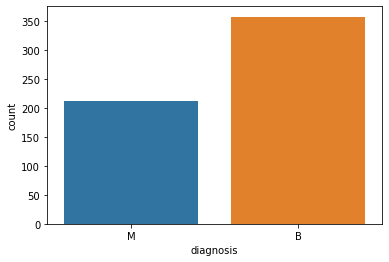

In [7]:

ax=sns.countplot(y,label='Count')  #equivalent to bar graph
M=np.count_nonzero(y=='M')
B=np.count_nonzero(y=='B')
print('Number of Malignant Tumors:',M)
print('Number of Benign Tumors:',B)

#a class imbalance problem is observed and it will be addressed in step after EDA by modifying sampling technique to stratified,etc.

### 2)For the numeric data columns understand their statistical distribution 

In [8]:
x.describe()

#few insights we can draw are like max of area_mean and smoothness_mean are very polarized so is there a need for feature ormalization before we proceed with the model training,etc. 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h2 align=center> Data Visualization </h2>

---

### 3)As observed above there is large disparity in ranges of numeric data so there is a need to first normalize data for effective visualizations.

In [9]:
x_new=(x-x.mean())/x.std()

### 4)To plot violinplots for 10  features at a time and separate plots for malignant and benign label data points adjacently.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

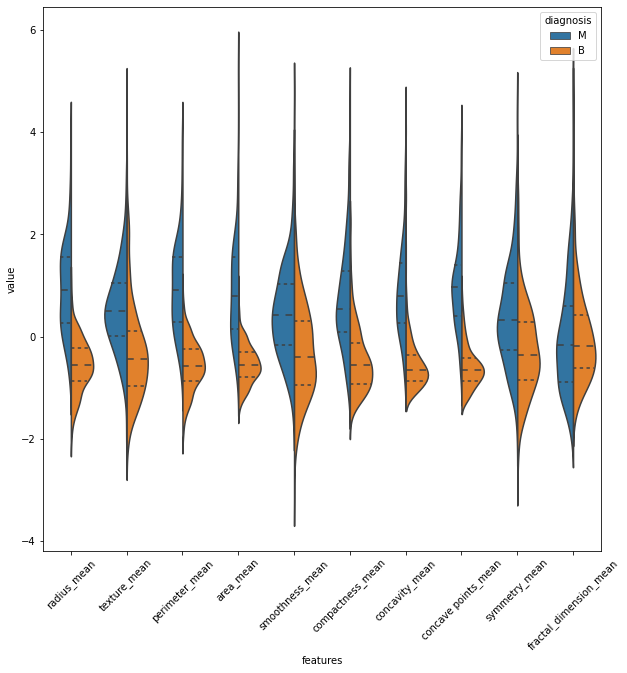

In [10]:
data=pd.concat([y,x_new.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars='diagnosis',
            var_name='features',
            value_name='value')
plt.figure(figsize=(10,10)) #to set size of plot
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=45)  #so that feature names dont overlap


#insights drawn are:
#i)For texture_mean the median of benign and malignant data are very far apart so good feature for classification.
#ii)For fractal_dimension_mean the medians for malignant and benign data is very close so feature wont give good predictive info for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

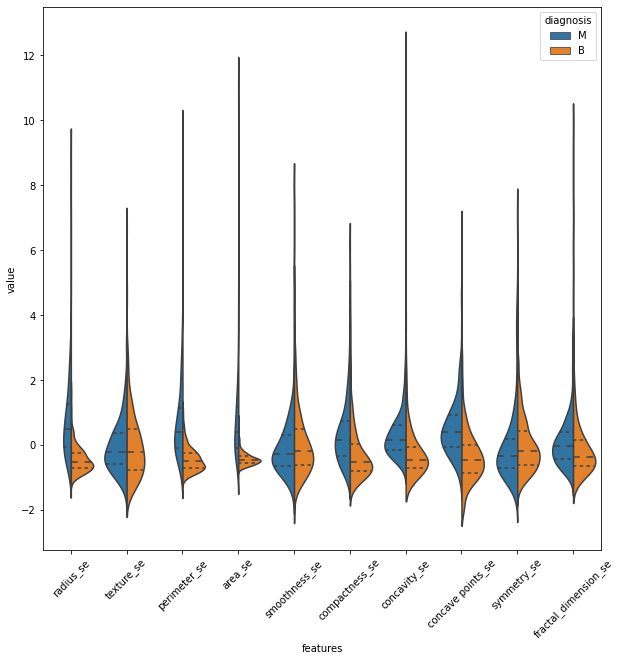

In [11]:
data=pd.concat([y,x_new.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars='diagnosis',
            var_name='features',
            value_name='value')
plt.figure(figsize=(10,10)) #to set size of plot
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

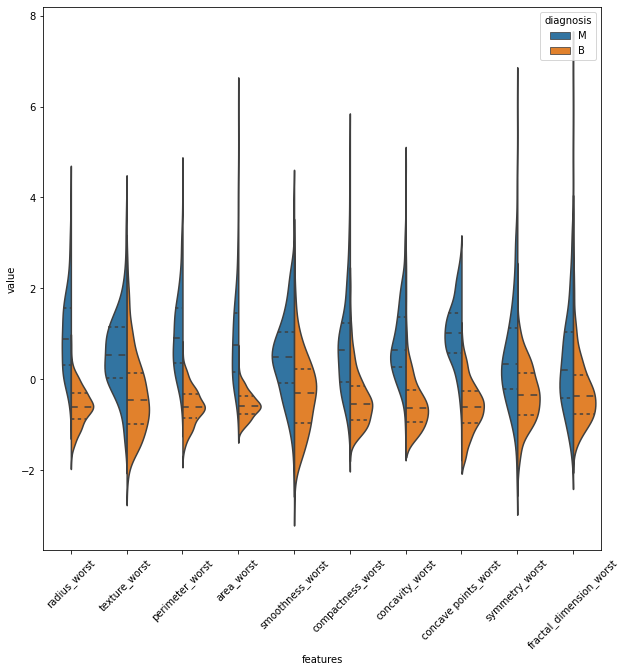

In [12]:
data=pd.concat([y,x_new.iloc[:,20:30]],axis=1)
data=pd.melt(data,id_vars='diagnosis',
            var_name='features',
            value_name='value')
plt.figure(figsize=(10,10)) #to set size of plot
sns.violinplot(x='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation=45)

#insights are:
#1)concavity_worst and concavity_points_worst plots are almost same and we can check if they are highly correlated and if is so we can drop one of the variables to avoid such redundancy.

### 5)Now suppose we dont need kernel probability density info provided by vioinplots further and just want to observe basic ranges and outliers then use boxplots.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

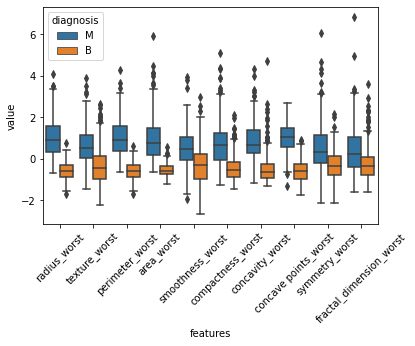

In [13]:
#boxplot for last 10 features and can easily observe outliers
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45)

### 6)Now use Jointplots to understand degree of correlation between features and if features are highly correlated then can drop one to reduce redundancy and complexity of model.

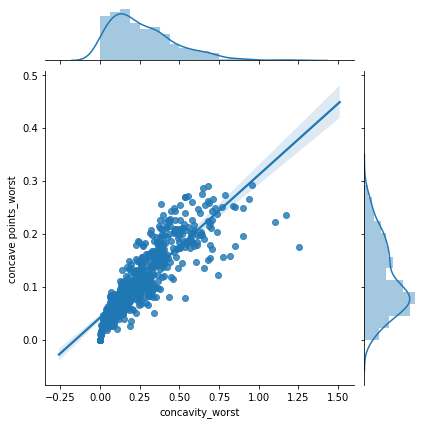

In [14]:
sns.jointplot(x.loc[:,'concavity_worst'],  #x axis
             x.loc[:,'concave points_worst'],  #y axis
             kind='regg')  #as we are seeing correlation between x and y so plot a regression line also

#thus these two features are highly correlated,good preliminary analysis and can do more quantitative measures like finding pearson's correlation coeff.

### 7)swarmplots are a great way to compliment violin/box plots with each data point given representation and can help to understand which are the best features for classification by seeing degree of class data seperability.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

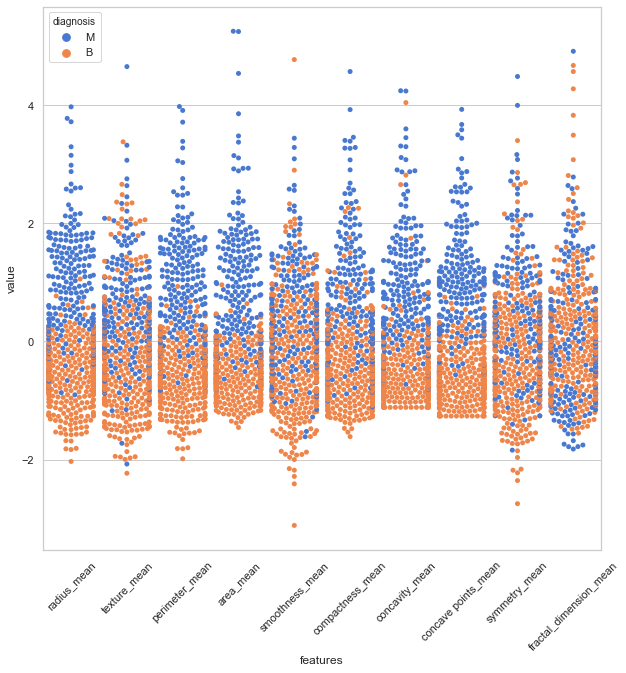

In [15]:
#Observing the Distribution of Values and their Variance with Swarm Plots

sns.set(style='whitegrid',palette='muted')#to provide a good contrast for data points wth background

data=pd.concat([y,x_new.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars='diagnosis',
            var_name='features',
            value_name='value')
plt.figure(figsize=(10,10)) #to set size of plot
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45)

#insights:
#features such as area_mean,radius_mean,perimeter_mean is great for classification as great data separabilty among the two classes data points.
#features such as symmetry_mean,smoothness_mean not providing much info and are not predictive features.
#can prliminarily analyze similarly for all 30 features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

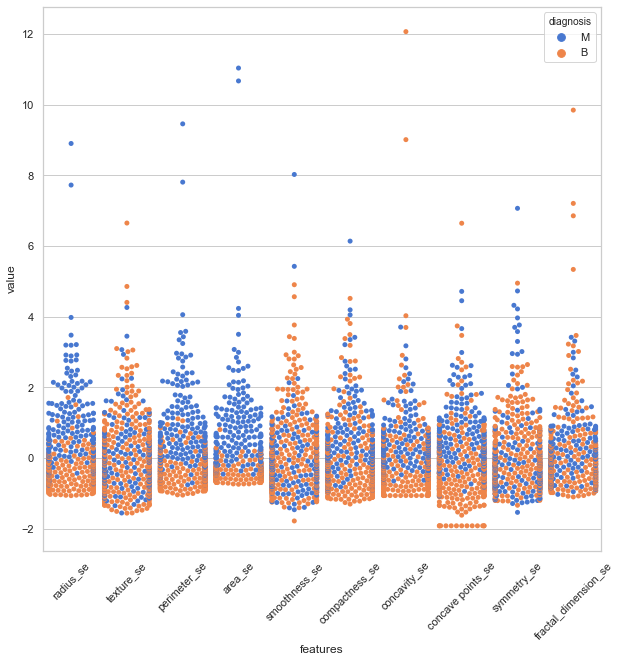

In [16]:
data=pd.concat([y,x_new.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars='diagnosis',
            var_name='features',
            value_name='value')
plt.figure(figsize=(10,10)) #to set size of plot
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

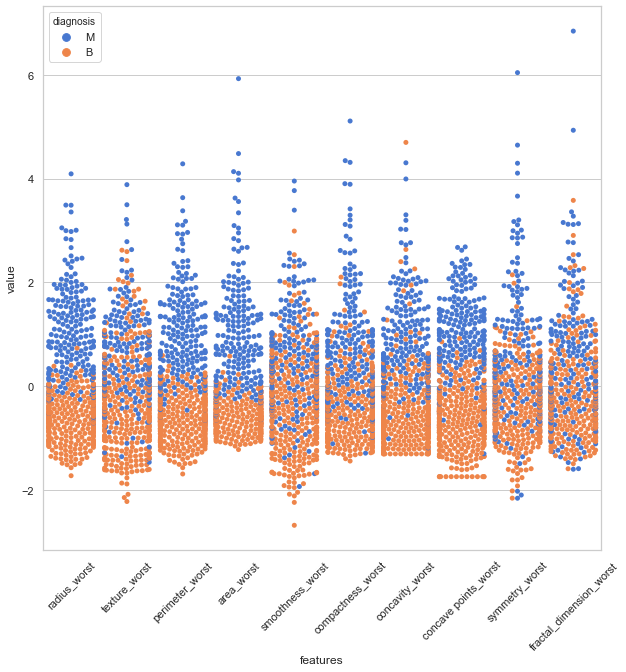

In [17]:
data=pd.concat([y,x_new.iloc[:,20:30]],axis=1)
data=pd.melt(data,id_vars='diagnosis',
            var_name='features',
            value_name='value')
plt.figure(figsize=(10,10)) #to set size of plot
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=45)

### 8) To observe correlation between features so as to identify redundant features by using heatmap on correlation matrix and Pairplots

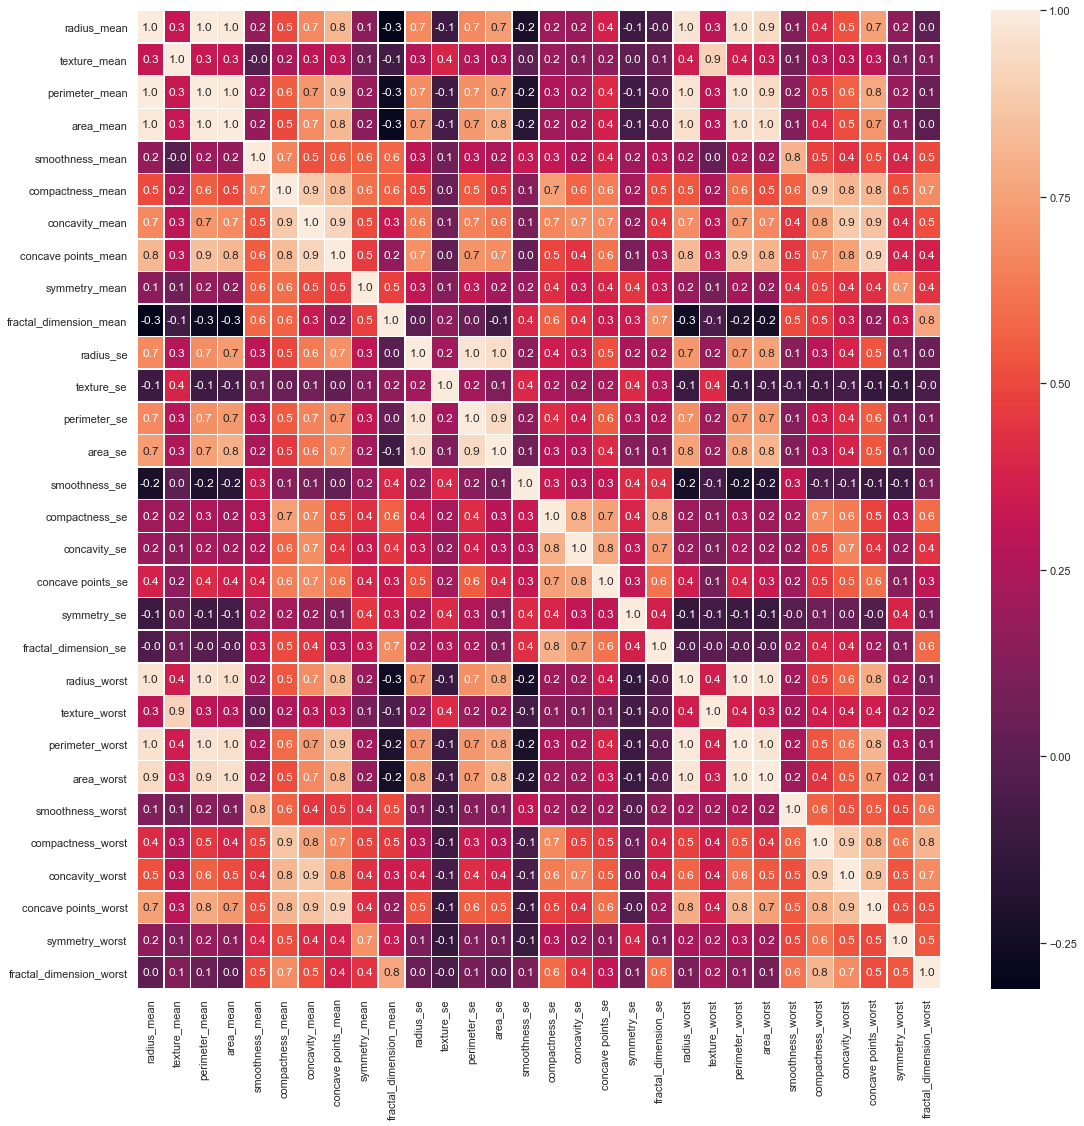

In [18]:
f,ax=plt.subplots(figsize=(18,18)) #as 900 subplots will be there
sns.heatmap(x.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax) #x.corr() is correlation matrix of all 30 columns of x i.e. the 30 features

In [19]:
#insights:
#Using the heatmap of the correlation matrix, we were able to identify columns to be dropped.
#Out of a set of correlated features, we will preserve the one that best separates the data.
#We will identify these salient features using the violin plots and swarm plots produced previously.

### 9)Now from above heatmap and swarm/violin plots we have ascertained the pairs of highly correlated features(r=1) and we drop one feature from each pair i.e. the one which does not seperate data well.

In [20]:
drop_cols=['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst']   #these are the list of features (one from each pair obtained from correlation matrix) that give least data separability according to swarm/violinplots

X=x.drop(drop_cols,axis=1)  #new feature marix
X.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


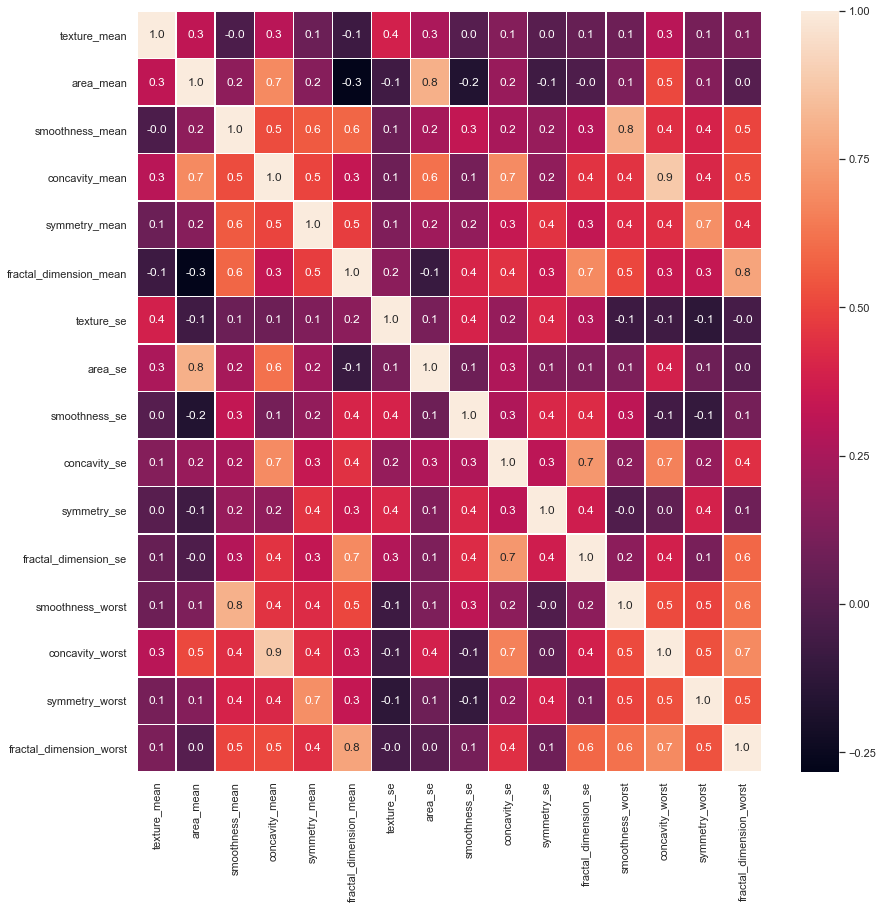

In [21]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

### 10)EVALUATING FEATURE SELECTION METHODS USING XGBOOST

In [22]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix  #for imbalanced classes datasets cant rely on just accuracy need to use f1 score also(precision+recall)
from sklearn.metrics import accuracy_score

C:\Users\Ajinkeya\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### MODEL 1: BASELINE MODEL WITH ONLY INCORPORATING THE BASIC FEATURE SELECTION DONE ABOVE USING CORRELATION MATRIX.

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

clf_1=xgb.XGBClassifier(random_state=42)
clf_1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

Accuracy is:  0.9766081871345029


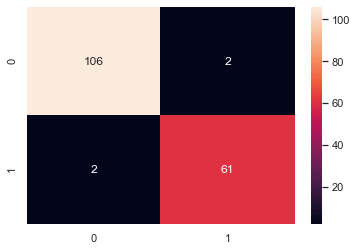

In [26]:
print('Accuracy is: ',accuracy_score(y_test,clf_1.predict(X_test)))
cm=confusion_matrix(y_test,clf_1.predict(X_test))
sns.heatmap(cm,annot=True,fmt='d')

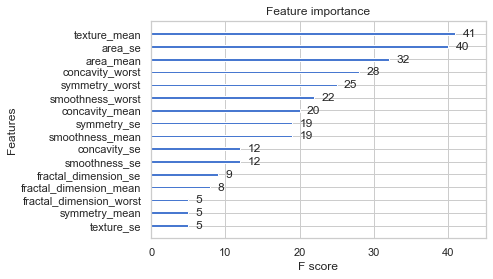

In [27]:
from xgboost import plot_importance
plot_importance(clf_1, );

### MODEL 2: MODEL WITH ADVANCED FEATURE SELECTION IN WHICH K BEST FEATURES ARE USED WHICH ARE CHOSEN BASED ON CHI SQUARED STATISTICAL EVALUATION PARAMETER

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  #measures dependance between stochaistic variables

#using this we can remove parameters that dont have dependance with target variabble and thus dont provide valuable info for classification.

In [29]:
#to select top 10 features based on chi 2 test

select_feature=SelectKBest(chi2,k=10).fit(X_train,y_train)
print('Score list: ',select_feature.scores_) #scores of all the original features
print('Features are: ',X_train.columns)

Score list:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Features are:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9824561403508771


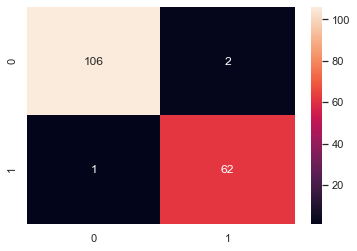

In [30]:
X_train_2=select_feature.transform(X_train)  #choose top 10 features from all above
X_test_2=select_feature.transform(X_test)

clf_2=xgb.XGBClassifier()
clf_2.fit(X_train_2,y_train)
print('Accuracy is: ',accuracy_score(y_test,clf_2.predict(X_test_2)))
cm=confusion_matrix(y_test,clf_2.predict(X_test_2))
sns.heatmap(cm,annot=True,fmt='d')

### MODEL 3: MODEL USING RECURSIVE FEATURE ELIMINATION WITH CROSS-VALIDATION

In [31]:
#it will find most optimal features on its own,no need to specify anything
from sklearn.feature_selection import RFECV

clf_3=xgb.XGBClassifier()
rfecv=RFECV(estimator=clf_3,  #estimator being used
           step=1,            #no. of features to be eliminated in each step
           cv=5,              #5-fold CV
           scoring='accuracy', #metric to evaluate model on
           n_jobs=-1).fit(X_train,y_train)         #use all CPU cores

print('Optimal number of features: ',rfecv.n_features_)
print('List of optimal features: ',X_train.columns[rfecv.support_])

Optimal number of features:  14
List of optimal features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


In [32]:
print('Accuracy is:',accuracy_score(y_test,rfecv.predict(X_test)))

Accuracy is: 0.9824561403508771


[Text(0, 0.5, 'cv_score'), Text(0.5, 0, 'No. of features')]

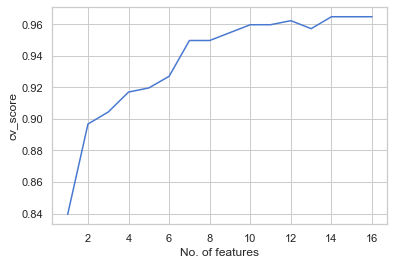

In [33]:
num_features=[i for i in range(1,len(rfecv.grid_scores_)+1)]
cv_scores=rfecv.grid_scores_
ax=sns.lineplot(x=num_features,y=cv_scores)
ax.set(xlabel='No. of features',ylabel='cv_score')

### MODEL 4: MODEL WHICH USED PCA FOR FEATURE EXTRACTION(USEFUL FOR DATASET WITH HIGH NUMBER OF FEATURES LIKE IN THOUSANDS,MILLIONS,etc)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#always normalize features before applying PCA

X_train_norm=(X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_norm=(X_test-X_test.mean())/(X_test.max()-X_test.min())

Text(0, 0.5, 'Cumulative explained variance')

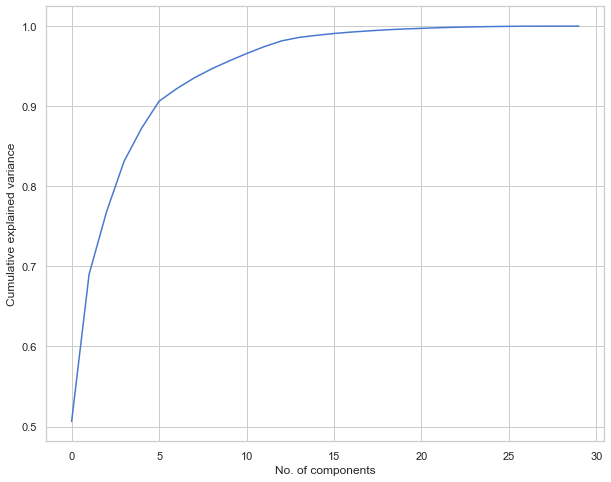

In [35]:
from sklearn.decomposition import PCA

pca=PCA().fit(X_train_norm)  #pca is context dependant,ex: need features that explain 95% variance in data so only those features selected for which we get 95% acccuracy

plt.figure(1,figsize=(10,8))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components') #in pca no features are dropped,rather they are projected to a lower dimension
plt.ylabel('Cumulative explained variance')  #the variance accounted for in the data i.e. accuracy corresponding to number of features
             

In [36]:
#insights:
#thus if we want 99% accuracy(99% variance in data explained) then we can stop at about 15 features only.